In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data
train_data = pd.read_csv('C:\\Users\\ACER\\Desktop\\programming\\data science\\train.csv')

In [4]:
# After loading the dataset examine its shape to know
train_data.shape

(891, 12)

In [5]:
# viewing first few rows
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# knowing data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
print (train_data.keys())
len(train_data.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


12

In [16]:
train_data.keys()[1]

'Survived'

In [22]:
for i in range(len(train_data.keys())):
    print (type(train_data.keys()[i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


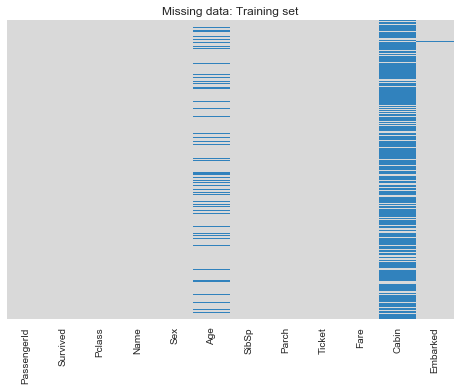

In [25]:
# Heat map
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap = 'tab20c_r')
plt.title('Missing data: Training set')
plt.show()

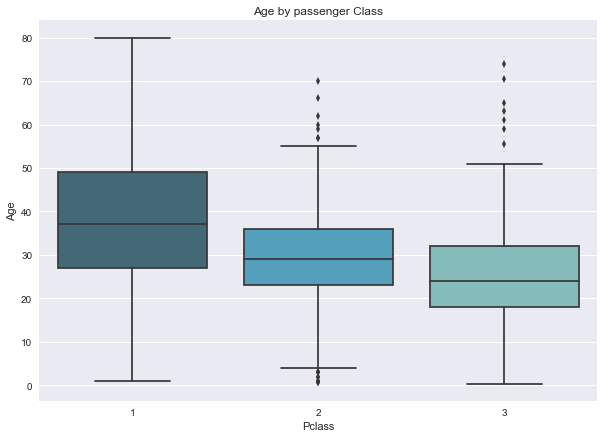

In [28]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data, palette = 'GnBu_d').set_title('Age by passenger Class')
plt.show()

In [29]:
# imputation function
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else: 
            return 24
    else:
        return Age

# Applying the function to the Age colunm
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age, axis = 1)

In [30]:
# remove cabin column since it has so many missing data
train_data.drop('Cabin', axis = 1, inplace = True)

In [31]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
len(train_data.keys())

11

In [33]:
# remove rows with missing datas
train_data.dropna(inplace = True)

In [34]:
print (train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


In [36]:
# identify the non-null objects
print ('\n')
print ('Non-null objects to be converted to category')
print (train_data.select_dtypes(['object']).columns)



Non-null objects to be converted to category
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [39]:
# remove unneccessary column
train_data.drop(['Name','Ticket'], axis = 1, inplace = True)

In [40]:
# Convert objects to category data type
objcat = ['Sex','Embarked']

In [42]:
# convert object to category data type
for colname in objcat:
    train_data[colname] = train_data[colname].astype('category')

In [43]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [45]:
# Numerical summary
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.019314,13.209814,0.42,22.0000,26.0000,36.5,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


In [46]:
# remove the PassengerId
train_data.drop('PassengerId', axis = 1, inplace = True)

In [47]:
# survived is our target variable, its the dependent varible we are trying to predict
print ('Target varible')
print (train_data.groupby(['Survived']).Survived.count())

Target varible
Survived
0    549
1    340
Name: Survived, dtype: int64


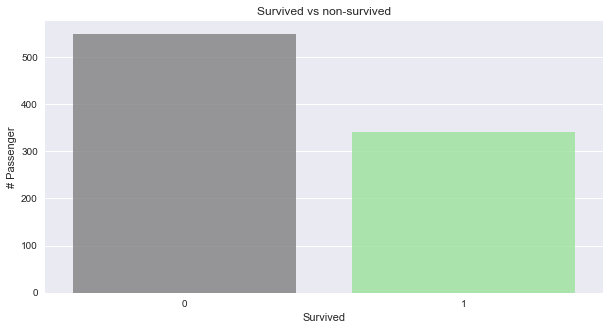

In [50]:
# Target Varible counterplot
# set background color with sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(train_data['Survived'],alpha = .80, palette = ['grey', 'lightgreen'])
plt.title('Survived vs non-survived')
plt.ylabel('# Passenger')
plt.show()

In [51]:
# identify numerical feature
print ('Continuous Variable')
print (train_data[['Age','Fare']].describe().transpose())
print ('--'* 40)
print ('Discrete Variables')
print (train_data.groupby('Pclass').Pclass.count())
print (train_data.groupby('SibSp').SibSp.count())
print (train_data.groupby('Parch').Parch.count())


Continuous Variable
      count       mean        std   min      25%      50%   75%       max
Age   889.0  29.019314  13.209814  0.42  22.0000  26.0000  36.5   80.0000
Fare  889.0  32.096681  49.697504  0.00   7.8958  14.4542  31.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64
SibSp
0    606
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
Parch
0    676
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


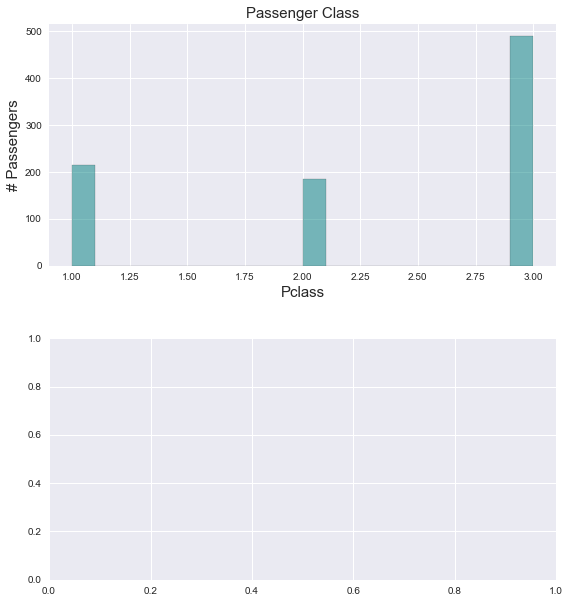

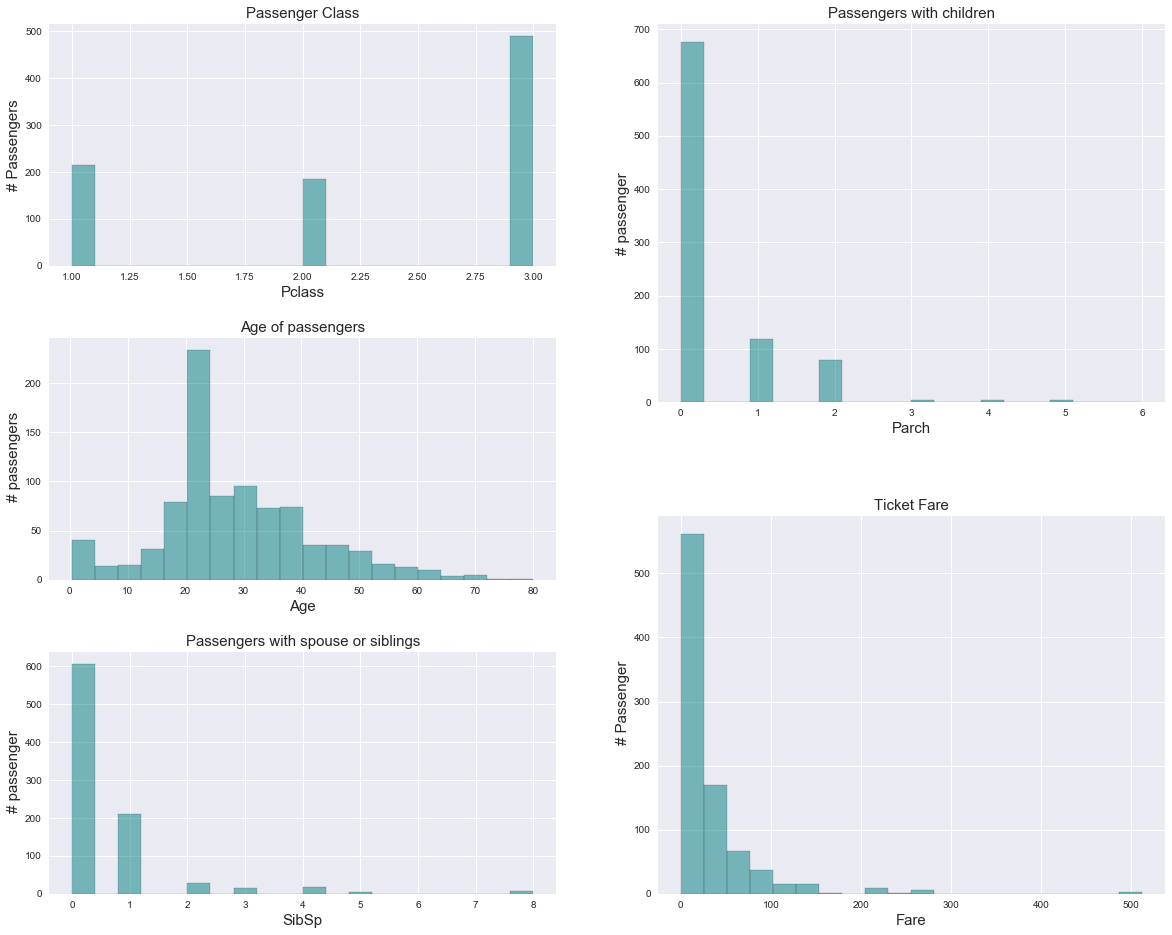

In [54]:
# subplots of numerical features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(train_data['Pclass'], bins = 20, alpha = 0.50, edgecolor = 'black', color = 'teal')
ax1.set_xlabel('Pclass',fontsize = 15)
ax1.set_ylabel('# Passengers', fontsize = 15)
ax1.set_title('Passenger Class', fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(train_data['Age'], bins = 20, alpha = 0.50, edgecolor = 'black', color = 'teal')
ax2.set_xlabel('Age', fontsize = 15)
ax2.set_ylabel(' # passengers', fontsize = 15)
ax2.set_title('Age of passengers', fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(train_data['SibSp'], bins = 20, alpha = 0.50, edgecolor = 'black', color = 'teal')
ax3.set_xlabel('SibSp', fontsize = 15)
ax3.set_ylabel(' # passenger', fontsize = 15)
ax3.set_title('Passengers with spouse or siblings', fontsize = 15)


ax4 = fig.add_subplot(222)
ax4.hist(train_data['Parch'], bins = 20, alpha = 0.50, edgecolor = 'black', color = 'teal')
ax4.set_xlabel('Parch', fontsize = 15)
ax4.set_ylabel('# passenger', fontsize = 15)
ax4.set_title('Passengers with children', fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(train_data['Fare'], bins = 20, alpha = 0.50, edgecolor = 'black', color = 'teal')
ax5.set_xlabel('Fare', fontsize = 15)
ax5.set_ylabel(' # Passenger', fontsize = 15)
ax5.set_title('Ticket Fare', fontsize= 15)

plt.show()

passenger class summary


Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


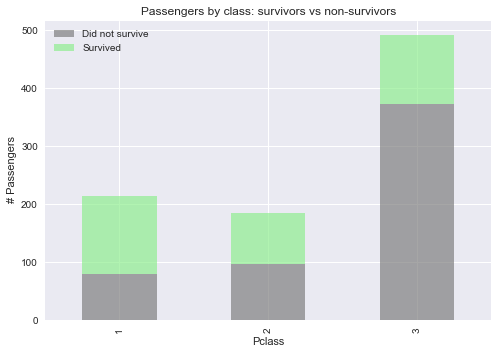

In [56]:
# passenger class summary
print ('passenger class summary')

print ('\n')
print (train_data.groupby(['Pclass','Survived']).Pclass.count().unstack())

# Passenger class visualization

pclass = train_data.groupby(['Pclass', 'Survived']).Pclass.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, title = 'Passengers by class: survivors vs non-survivors', color = ['grey', 'lightgreen'], alpha = .70)
p1.set_xlabel('Pclass')
p1.set_ylabel(' # Passengers')
p1.legend(['Did not survive', 'Survived'])
plt.show()

Passengers with siblings or spouse


Survived      0      1
SibSp                 
0         398.0  208.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


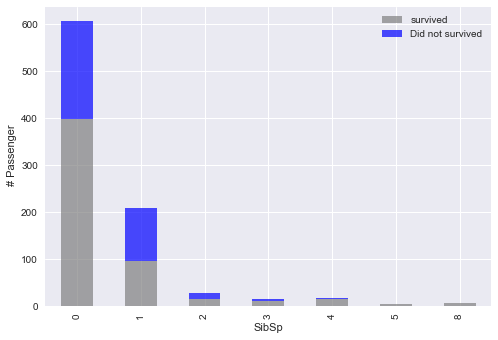

In [66]:
# SibSb summary
print ('Passengers with siblings or spouse')
print ('\n')
print (train_data.groupby(['SibSp','Survived']).SibSp.count().unstack())

sibsp = train_data.groupby(['SibSp', 'Survived']).SibSp.count().unstack()
p2 = sibsp.plot(kind = 'bar', stacked = True, color = ['grey', 'blue'], alpha = .70)
p2.set_xlabel('SibSp')
p2.set_ylabel(' # Passenger')
p2.legend(['survived','Did not survived'])
plt.show()

Passengers with Children


Survived      0      1
Parch                 
0         445.0  231.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


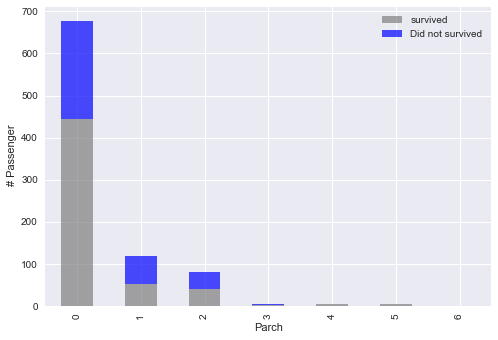

In [67]:
# passengers with children
print ('Passengers with Children')
print ('\n')
print (train_data.groupby(['Parch','Survived']).Parch.count().unstack())

parch = train_data.groupby(['Parch', 'Survived']).Parch.count().unstack()
p2 = parch.plot(kind = 'bar', stacked = True, color = ['grey', 'blue'], alpha = .70)
p2.set_xlabel('Parch')
p2.set_ylabel(' # Passenger')
p2.legend(['survived','Did not survived'])
plt.show()

In [68]:
# statistical summary of continuous varible
print ('Statistical summary of Age and Fare')
print ('\n')
print ('Did not Survive')
print (train_data[train_data['Surivived']== 0][['Age', 'Fare']].describe().transpose())
print ('--'*40)
print ('Survived')
print (train_data[train_data['Surivived']== 1][['Age', 'Fare']].describe().transpose())
# subplots of numeric feature

sns.set_style('darkgrid')
fig = figure.plot(figsize= (16,10))
fig.subplots_adjust(hspace = .30)


ax1 = fig.add_subplot(221)
ax1.hist(train_data[train_data['Survived'] ==0].Age, bins = 25, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(train_data[train_data['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(train_data[train_data['Survived']==0].Fare, bins = 25, label = 'Did Not Survive', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(train_data[train_data['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax2.set_title('Ticket Fare: Suvivors vs Non-Survivors')
ax2.set_xlabel('Fare')
ax2.set_ylabel('# Passenger')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.scatter(x = train_data[train_data['Survived']==0].Age, y = train_data[train_data['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = train_data[train_data['Survived']==1].Age, y = train_data[train_data['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()

plt.show()

Statistical summary of Age and Fare


Did not Survive


KeyError: 'Surivived'